In [176]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

moons = make_moons(n_samples=10000, noise=0.01)



In [177]:
X = moons[0]
y = moons[1]

print(X.shape , "\n" , X)
print(y.shape , y)

(10000, 2) 
 [[ 1.02741365 -0.48403085]
 [ 0.42283203 -0.33082437]
 [ 0.46301572  0.90149783]
 ...
 [ 0.98702052  0.2580463 ]
 [ 0.95111248  0.29662541]
 [ 1.97063313  0.23047614]]
(10000,) [1 1 0 ... 0 0 1]


Partage en jeux de test et d'entraînement

In [178]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25)
print(Xtest.shape)

(2500, 2)


Recherche des paramètres

In [179]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : list(range(1,20))}
estimator = DecisionTreeClassifier()
cross_validation = 5

gridsearch = GridSearchCV(estimator,parameters,cv=cross_validation)
gridsearch.fit(Xtrain,ytrain)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]})

In [180]:
gridsearch.best_params_

{'max_depth': 6}

In [181]:
max_depth = gridsearch.best_params_['max_depth']
tree = DecisionTreeClassifier(max_depth=max_depth)
tree.fit(Xtest, ytest)

DecisionTreeClassifier(max_depth=6)

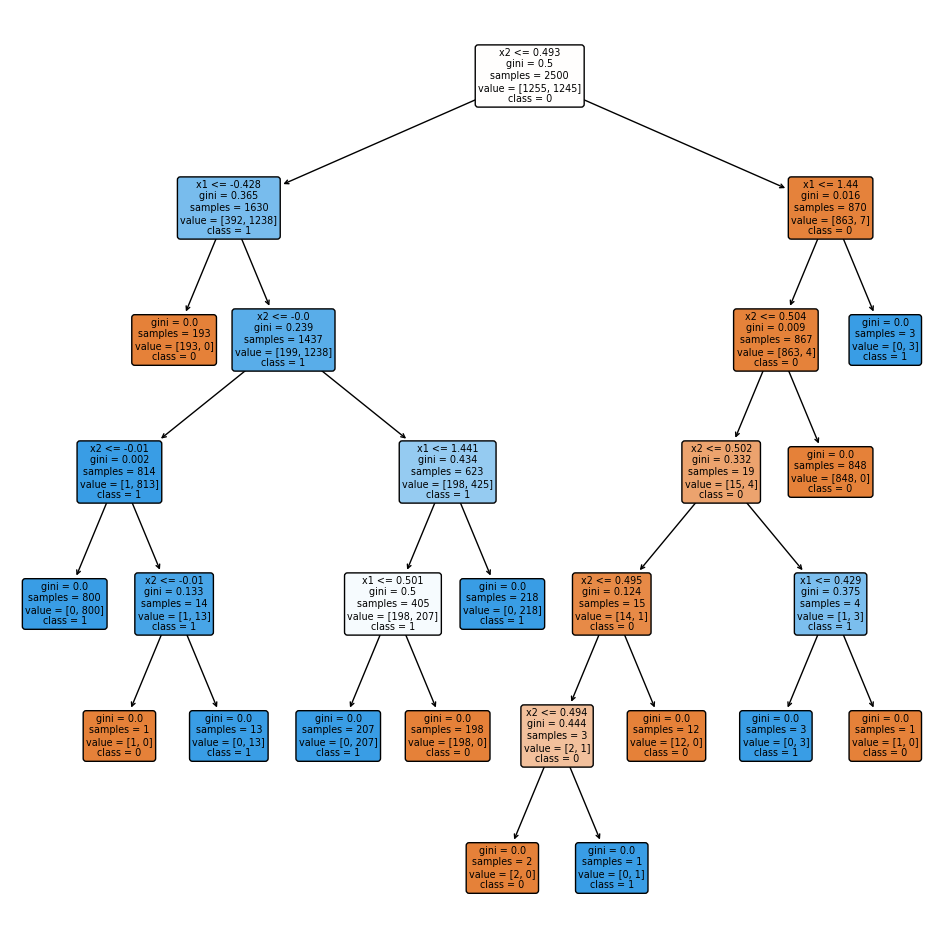

In [182]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 12))

plot_tree(tree, filled=True, rounded=True, class_names=["0", "1"], feature_names=["x1", "x2"])
plt.show()


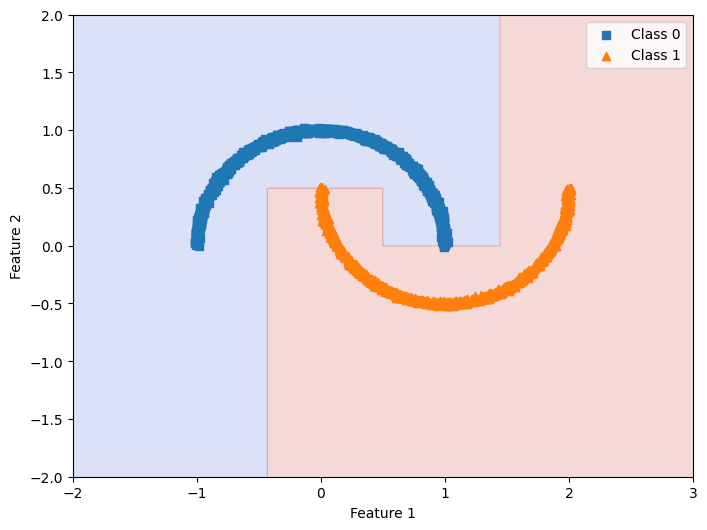

In [183]:
import numpy as np

# create a grid of points that span the feature space
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-2, 2, 500))
Xgrid = np.column_stack([xx.ravel(), yy.ravel()])

# predict the class labels for the grid of points
ygrid = tree.predict(Xgrid)

# plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, ygrid.reshape(xx.shape), alpha=0.2, cmap='coolwarm')

# plot the test data
plt.scatter(Xtest[ytest==0, 0], Xtest[ytest==0, 1], marker='s', label='Class 0')
plt.scatter(Xtest[ytest==1, 0], Xtest[ytest==1, 1], marker='^', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Exercice : entrainez et réglez un arbre de décision pour le jeu de données moons 
- générez un jeu de données moons avec make_moons(n_samples=10000, noise 0.4)
- partagez-le en jeu d'entrainement/jeu de test
- utilisezune recherche par quadrillage avec validation croisée (à l'aide de la classe GridSearchCV) pour rechercher les bonnes valeurs d'hyperparamètres
- entrainez l'arbre de décision sur l'ens du jeu d'entrainement en utilisant ces hyperparamètres et mesurez les performances de votre modèle sur le jeu de test.